In [1]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the final results
test_df = pd.read_csv("isolation-forest/test_with_final_anomalies.csv")
predict_df = pd.read_csv("isolation-forest/predict_with_final_anomalies.csv")

# Check anomalies count
print("Anomalies in Test Dataset:", test_df['is_anomalous'].sum())
print("Anomalies in Predict Dataset:", predict_df['is_anomalous'].sum())

# Display a few anomalies
print("Sample Anomalies in Test Data:")
print(test_df[test_df['is_anomalous'] == True].head())

print("Sample Anomalies in Predict Data:")
print(predict_df[predict_df['is_anomalous'] == True].head())


Anomalies in Test Dataset: 707
Anomalies in Predict Dataset: 247
Sample Anomalies in Test Data:
                   timestamp log_level                          source  \
22   2017-05-16 00:00:17.531      INFO       nova.metadata.wsgi.server   
27   2017-05-16 00:00:21.069      INFO  nova.osapi_compute.wsgi.server   
28   2017-05-16 00:00:30.788      INFO  nova.osapi_compute.wsgi.server   
65   2017-05-16 00:00:58.766      INFO       nova.metadata.wsgi.server   
113  2017-05-16 00:01:39.847      INFO       nova.metadata.wsgi.server   

                               request_id                           user_id  \
22                                    NaN                               NaN   
27   0b851395-2895-44b9-8265-a27d0bb52910  f7b8d1f1d4d44643b07fa10ca7d021fb   
28   6a763803-4838-49c7-814e-eaefbaddee9d  113d3a99c3da401fbd62cc2caa5b96d2   
65   f1603c09-bec5-418f-9b75-0f3393afea8a                                 -   
113                                   NaN                       

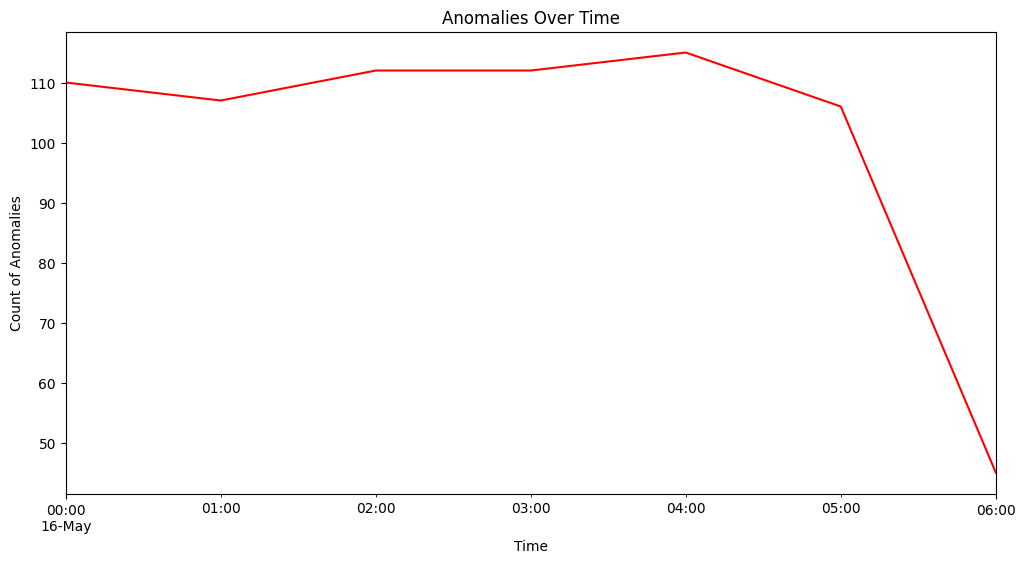

In [4]:
# Convert timestamp to datetime
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], errors='coerce')

# Group anomalies by time
anomalies_over_time = test_df[test_df['is_anomalous'] == True].resample('H', on='timestamp').size()

# Plot anomalies over time
plt.figure(figsize=(12, 6))
anomalies_over_time.plot(kind='line', color='red', title='Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Anomalies')
plt.show()


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_16752/530882960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=anomalous_status, palette='coolwarm')


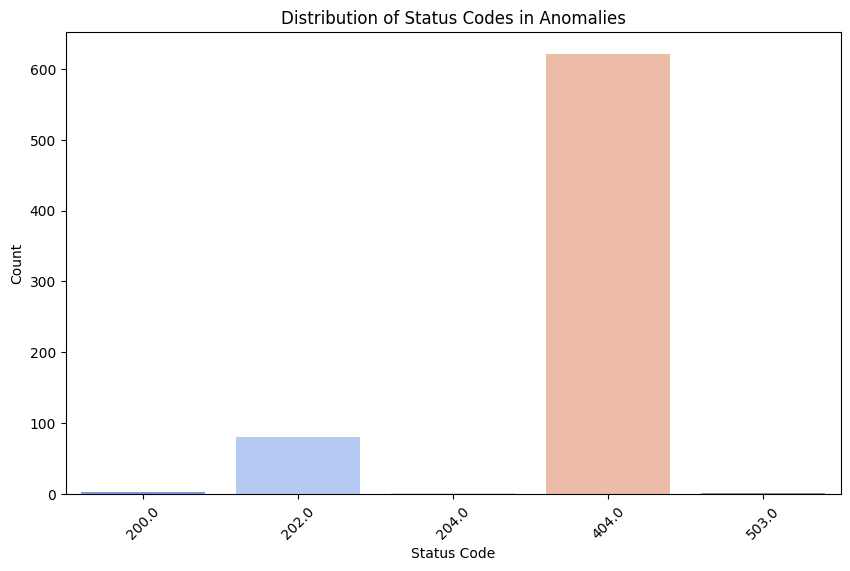

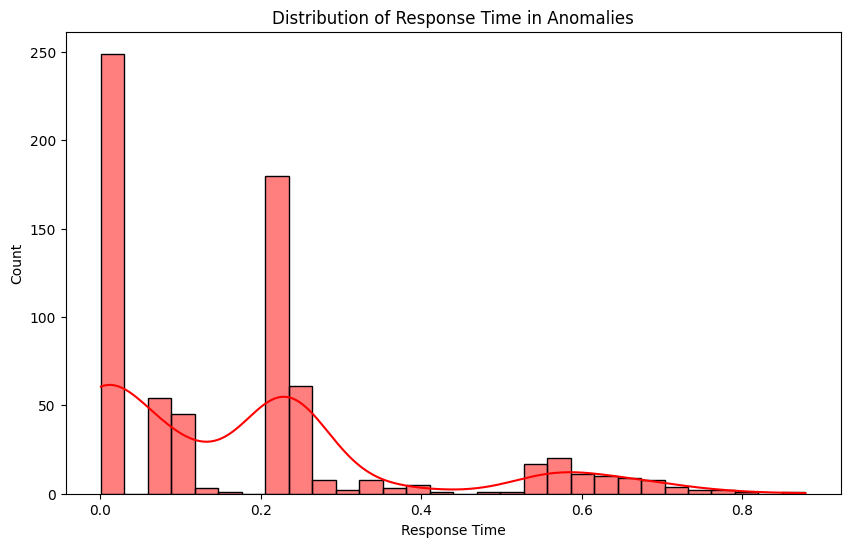

In [5]:
# Anomalous status codes
anomalous_status = test_df[test_df['is_anomalous'] == True]['status_code']

# Plot distribution of status codes
plt.figure(figsize=(10, 6))
sns.countplot(x=anomalous_status, palette='coolwarm')
plt.title("Distribution of Status Codes in Anomalies")
plt.xlabel("Status Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot response time of anomalies
plt.figure(figsize=(10, 6))
sns.histplot(test_df[test_df['is_anomalous'] == True]['response_time'], kde=True, bins=30, color='red')
plt.title("Distribution of Response Time in Anomalies")
plt.xlabel("Response Time")
plt.show()

